# Appendix: Additional Reading

This appendix section contains additional information which will deepen your understanding. However, it is not examinable and is completely optional reading.

### A1 More on populations

There are additional issues related to the definition of the population, that should be considered. 

* Is the population well defined?

Loosely speaking, we think about the population as being the wider group (often of people or patients) who we can generalise the results to. For some research questions the population of interest is well defined. For instance, suppose we undertake a study where we are attempting to estimate the proportion of adults (18 years and above) in the UK with hypertension in 2020. The population is well defined. Conversely, suppose we undertake a study to estimate the effect of a blood-pressure-lowering treatment among a sample of 50 patients in the UK in 2020. In this case, the population of interest can be difficult to pin down. Who can we generalize our results to? Is the population restricted in time and space? Can we generalise to patients in other countries? Can we generalise to future patients?  

* Is the sample representative of the population? 

Clearly a sample can be chosen in may ways, and the way in which we are able to make inferences about the population depends critically on the way in which the sample is selected: it is hard to over-emphasize the importance and relevance of the sampling process to the meaning and validity of the subsequent inferences. In this module, we will assume that sampling units (in this case, people) are randomly sampled from the population. 

* Is the population finite, or (effectively or potentially) infinite?

For example, a study of a new treatment for a disease may wish to generalise to all potential patients.

* Have we sampled all the population?

For example, a study of leukemia in the years following a leak from a nuclear power station may sample all subjects developing leukemia within the relevant time period in the vicinity of the power station. In such an example it is not clear how to define a wider population from which the sample can be considered to have been drawn. In these and other cases one approach is to consider a notional or counterfactual population, which can only have a conceptual existence.

In general the issues can be complex and will not be considered further here.

## A2 Bias of estimators

Using statistical theory it is possible to show that the sample mean, $\bar{X}$, is an unbiased estimator of the population mean, $\mu$. One of the simplest examples is when our random variables follow the *Bernoulli* distribution.

**Example** Let $X_1, X_2,.., X_n$ be Bernoulli trials with success parameter $p$.

Our estimate of $p$ is the sample mean, 

$$
\hat{p} = \bar{X} = \frac{X_1 + X_2 + ... + X_n}{n}
$$

We will now show that the expected value of this estimator is equal to the population mean, $p$. 

$$
\begin{align*}
E(\bar{X}) & = E\left[\frac{X_1 + X_2 + ... + X_n}{n}\right] \\
& = \frac{1}{n} E[X_1 + X_2 + ... + X_n] \qquad  \mbox{(we can take constants out of expectations)} \\
&= \frac{1}{n} (E(X_1) + E(X_2) + ... + E(X_n)) \\
&= \frac{1}{n} (p + p + ... + p) = p \\
\end{align*}
$$

This simple use of algebra illustrates that $\bar{X}$ is an unbiased estimator for $p$. 

**Exercise:** You can use similar logic to demonstrate that the sample mean is an unbiased estimator for the population mean when the random variables $X$ follow a normal distribution with known variance.

## A3 CLT for binary data

We will return to the emotional distress study again, using the sub-sample of 10 people, but this time measure a binary characteristic for each person - the presence of emotional distress. 

We suppose that, in the population, the true proportion is 28%. Under this assumption, we can simulate (draw) different samples,  each containing 10 people. If we do this a very large number of times, say 10,000, then the distribution of the different sample proportions we obtain will give us a very good picture of the true sampling distribution of the proportion. (Of course, remember that in practice we cannot do this because we won't know the true population proportion).

The code below obtains the approximate sampling distribution.

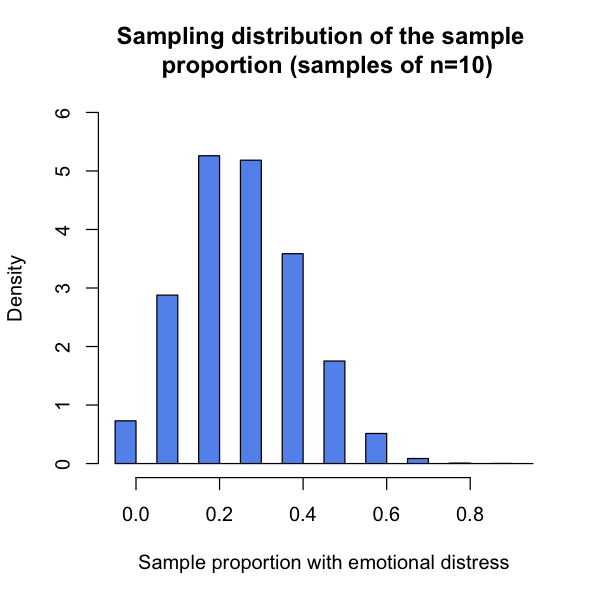

In [1]:
# Population parameters
pi <- 0.28
n_in_study <- 10

# Simulate data from multiple studies
different_studies <- 10000
set.seed(1042)
study_measurements_ed <- list()
for (i in 1:different_studies) {
  study_measurements_ed[[i]] <- rbinom(n_in_study, 1, pi)
}

# Calculate the proportion in each study
sample.props   <- sapply(study_measurements_ed, mean)

# Draw graphs
options(repr.plot.width=5, repr.plot.height=5)
hist(sample.props[1:10000], 
     freq=FALSE, breaks=seq(-0.05, 0.95, 0.05), col="cornflowerblue",
     ylim=c(0, 6), xlab="Sample proportion with emotional distress", 
     main="Sampling distribution of the sample \n proportion (samples of n=10)")  # the "\n" makes a newline


The graph above shows us a reasonably accurate picture of the sampling distribution. Unlike the sample mean, the sampling distribution of the sample proportion is not quite symmetric. It is also not continuous - the sample statistic can only take 10 different values, with a sample size of $n=10$. 

Below, the code shows that the mean of the sample means is approximately 0.28. (The discrepancy is just random error due to the fact that our "sampling distribution" does not come from an infinite number of samples. If we simulated a sufficiently large number of samples, this number would become closer to the true value of 0.28.)

The final line of code below lists the (approximate) probability density function, which gives us the whole sampling distribution for the sample proportion in this example.

In [2]:
### Summarise the approximate sampling distribution

# The mean value of the different sample means
mean(sample.props)

# The whole sampling distribution (i.e. the PDF)
table(sample.props)/different_studies

[1] 0.27911

sample.props
     0    0.1    0.2    0.3    0.4    0.5    0.6    0.7    0.8    0.9 
0.0365 0.1439 0.2630 0.2592 0.1793 0.0876 0.0257 0.0043 0.0004 0.0001 

Now we will explore what happens to the sampling distribution as we take larger samples. So instead of 10 people per sample, suppose we had 100 or 10,000 people in each sample. The central limit theorem tells us we expect the distribution to become more normal as we increase the sample size. 

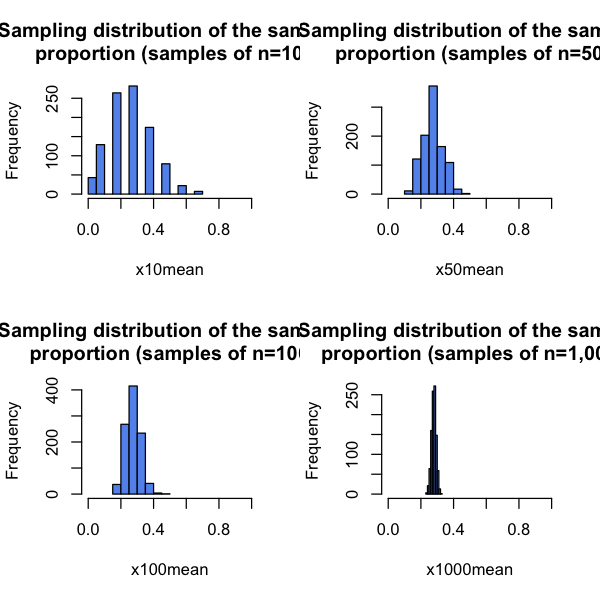

In [3]:
x10n <- sapply(rep(10,1000),function(x) rbinom(x, 1, p = 0.28)) 
x10mean <- colMeans(x10n)
                            
x50n <- sapply(rep(50,1000),function(x) rbinom(x, 1, p = 0.28)) 
x50mean <- colMeans(x50n)

x100n <- sapply(rep(100,1000),function(x) rbinom(x, 1, p = 0.28)) 
x100mean <- colMeans(x100n)

x1000n <- sapply(rep(1000,1000),function(x) rbinom(x, 1, p = 0.28)) 
x1000mean <- colMeans(x1000n)
                                
par(mfrow=c(2,2))
hist(x10mean,col="cornflowerblue",xlim=c(0,1), main="Sampling distribution of the sample \n proportion (samples of n=10)")
hist(x50mean,col="cornflowerblue",xlim=c(0,1), main="Sampling distribution of the sample \n proportion (samples of n=50)")        
hist(x100mean,col="cornflowerblue",xlim=c(0,1), main="Sampling distribution of the sample \n proportion (samples of n=100)")
hist(x1000mean,col="cornflowerblue",xlim=c(0,1), main="Sampling distribution of the sample \n proportion (samples of n=1,000)")

As predicted by the CLT, even though the original data are binary (each person has emotional distress or does not), the sample proportion (which is the mean of the binary outcomes) has a distribution which becomes approximately normal with sufficiently large samples.